## Лабраторная работа №1. Создание "истории о данных".


## Загрузка необходимых библиотек.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Описание набора данных. Загрузка данных.

**Context**
Dataset of Starcraft 2 games, played in different leagues/levels.



**Content**
Screen movements aggregated into screen-fixations.
-- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.



**Attribute Information:**

*GameID:* Unique ID number for each game (integer)

*LeagueIndex:* Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)

*Age:* Age of each player (integer)

*HoursPerWeek:* Reported hours spent playing per week (integer)

*TotalHours:* Reported total hours spent playing (integer)

*APM:* Action per minute (continuous)

*SelectByHotkeys:* Number of unit or building selections made using hotkeys per timestamp (continuous)

*AssignToHotkeys:* Number of units or buildings assigned to hotkeys per timestamp (continuous)

*UniqueHotkeys:* Number of unique hotkeys used per timestamp (continuous)

*MinimapAttacks:* Number of attack actions on minimap per timestamp (continuous)

*MinimapRightClicks:* number of right-clicks on minimap per timestamp (continuous)

*NumberOfPACs:* Number of PACs per timestamp (continuous)

*GapBetweenPACs:* Mean duration in milliseconds between PACs (continuous)

*ActionLatency:* Mean latency from the onset of a PACs to their first action in milliseconds (continuous)

*ActionsInPAC:* Mean number of actions within each PAC (continuous)

*TotalMapExplored:* The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)

*WorkersMade:* Number of SCVs, drones, and probes trained per timestamp (continuous)

*UniqueUnitsMade:* Unique unites made per timestamp (continuous)

*ComplexUnitsMade:* Number of ghosts, infestors, and high templars trained per timestamp (continuous)

*ComplexAbilitiesUsed:* Abilities requiring specific targeting instructions used per timestamp (continuous)





In [2]:
data = pd.read_csv('starcraft_player_data.csv', sep=",")
# Первые 5 строк датасета
data = data.drop(['GameID'], axis=1)
data.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [3]:
data.dtypes


LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

([<matplotlib.patches.Wedge at 0x1c464144580>,
 [Text(0.8045083504569398, 0.7501775216874028, 'Bronze'),
  Text(-0.6882236115228018, 0.8581073712202407, 'Silver'),
  Text(-1.0018407647429992, -0.45421920049593084, 'Gold'),
  Text(-0.06459903035833876, -1.0981015277636046, 'Platinum'),
  Text(0.7689506830637547, -0.7865842911066717, 'Diamond'),
  Text(1.0437779190648944, -0.3471709314913321, 'Master'),
  Text(1.0926494802731535, -0.12695319318082604, 'GrandMaster'),
  Text(1.0994231286952005, -0.03561999564930912, 'Professional')],
 [Text(0.4388227366128762, 0.40918773910221967, '23.9%'),
  Text(-0.37539469719425544, 0.4680585661201312, '23.7%'),
  Text(-0.5464585989507268, -0.24775592754323497, '18.3%'),
  Text(-0.03523583474091205, -0.5989644696892388, '16.3%'),
  Text(0.4194276453075025, -0.4290459769672754, '10.2%'),
  Text(0.5693334103990332, -0.18936596263163566, '4.9%'),
  Text(0.5959906256035381, -0.06924719628045056, '1.6%'),
  Text(0.5996853429246547, -0.019429088535986794, '1

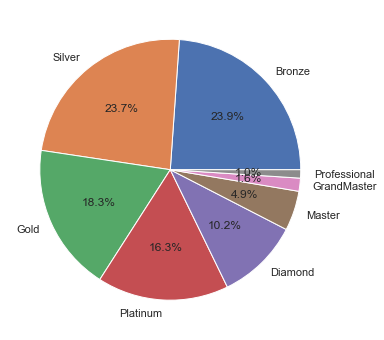

In [4]:
plt.figure(figsize=(6,6))
plt.pie(data['LeagueIndex'].value_counts(),labels=['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional'], autopct='%1.1f%%') 

15.910751722072478


<ipython-input-5-8b6b9db67a72>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HoursPerWeek'][i]= int(data['HoursPerWeek'][i])
<ipython-input-5-8b6b9db67a72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  except: data['HoursPerWeek'][i]=mean
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoursPerWeek', ylabel='Density'>

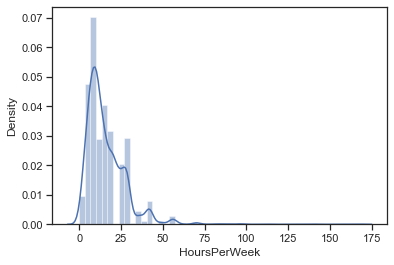

In [5]:
mean = 0
count = 0
for i in range(len(data['HoursPerWeek'])):
    if (data['HoursPerWeek'][i] !='?'):
        mean+=int(data['HoursPerWeek'][i])
        count+=1
mean=mean/count
print(mean)
for i in range(len(data['HoursPerWeek'])):
    try:
      data['HoursPerWeek'][i]= int(data['HoursPerWeek'][i])
    except: data['HoursPerWeek'][i]=mean
#print(data['HoursPerWeek'])
sns.distplot(data['HoursPerWeek'])

<AxesSubplot:xlabel='UniqueUnitsMade'>

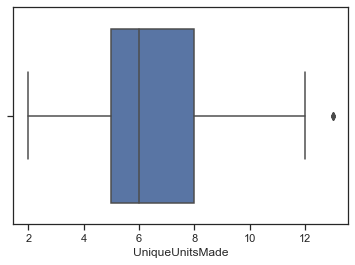

In [6]:
sns.boxplot(x=data['UniqueUnitsMade'])

<ipython-input-7-743ad4758516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LeagueIndex'][i]=labels[data['LeagueIndex'][i]-1]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='APM', ylabel='Density'>

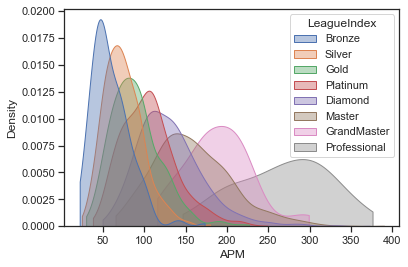

In [7]:
labels=['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']
for i in range(len(data['LeagueIndex'])):
     data['LeagueIndex'][i]=labels[data['LeagueIndex'][i]-1]
sns.kdeplot(data=data, x="APM", hue="LeagueIndex", hue_order=labels,cut=0, fill=True, common_norm=False, alpha=0.4)

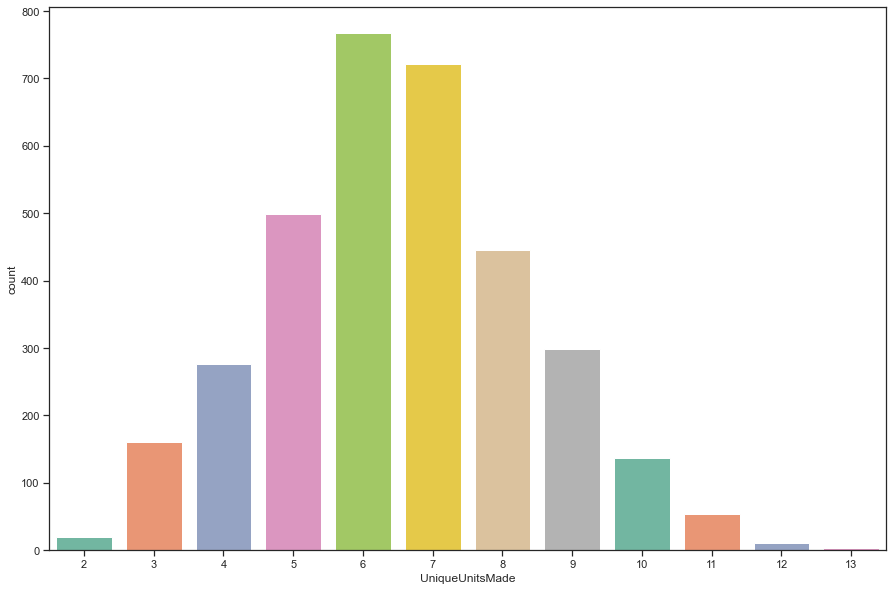

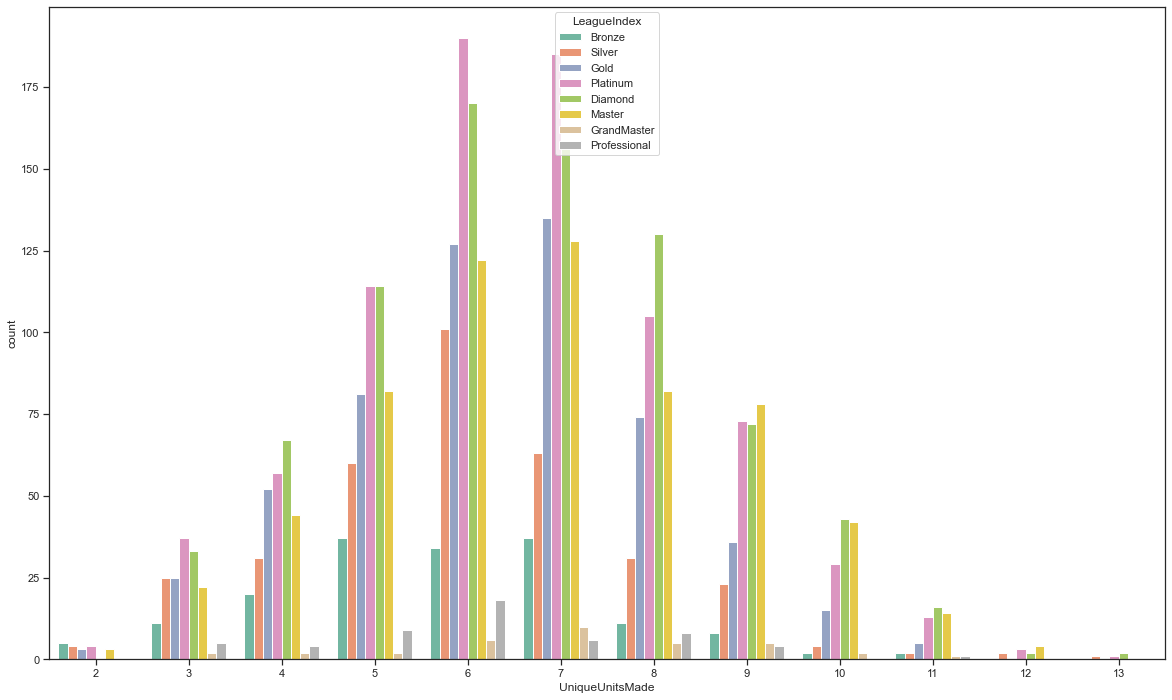

In [8]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.countplot(x = 'UniqueUnitsMade',  data = data, palette="Set2");
fig, axes = plt.subplots(figsize = (20, 12))
sns.countplot(x = 'UniqueUnitsMade', hue="LeagueIndex", hue_order=labels, data = data, palette="Set2");

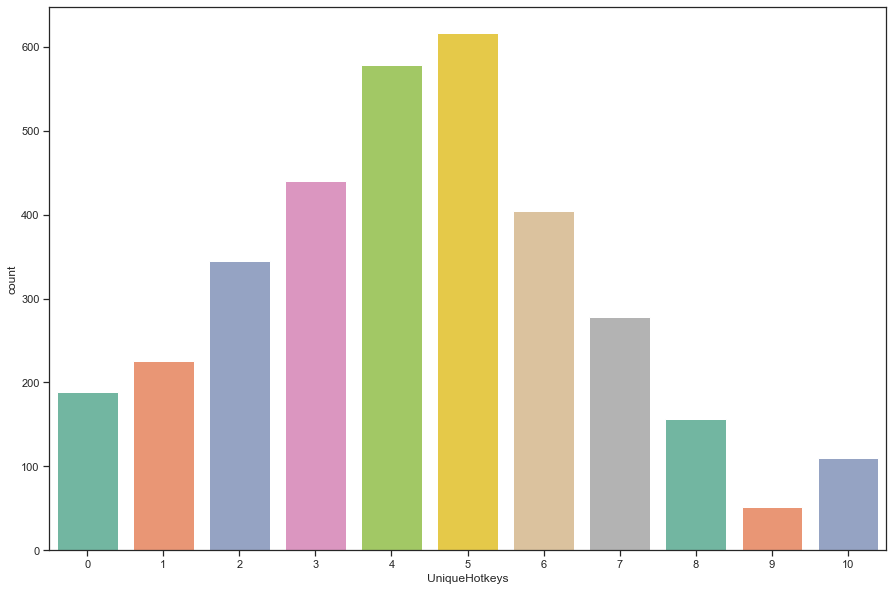

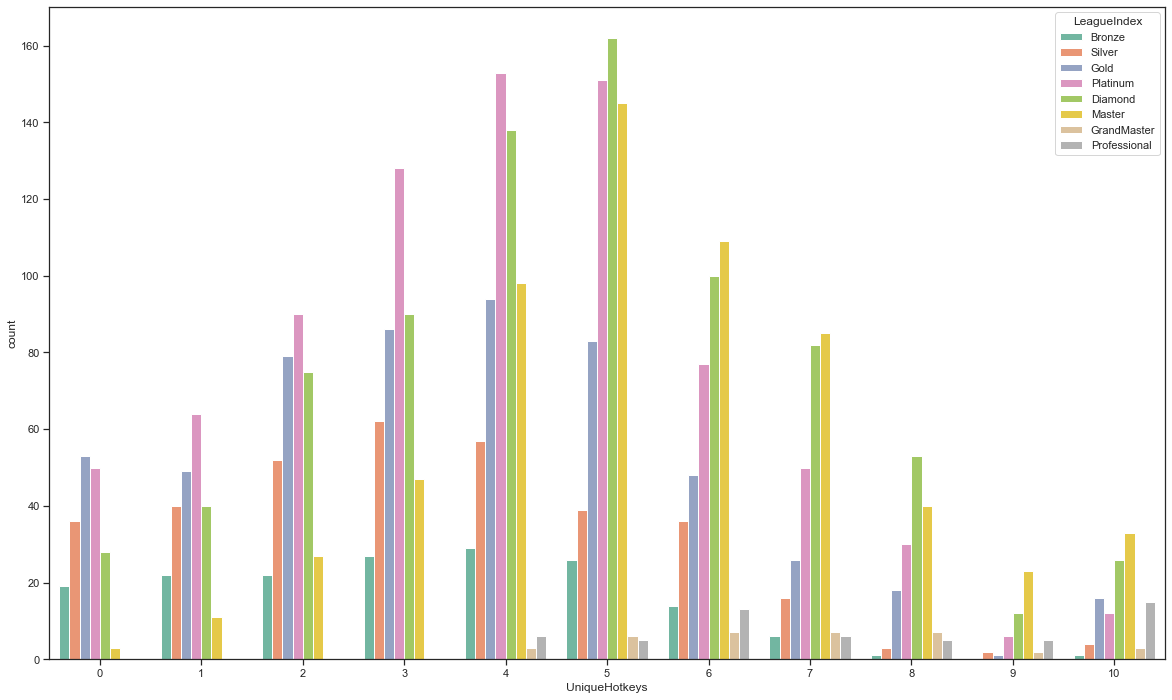

In [9]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.countplot(x = 'UniqueHotkeys',  data = data, palette="Set2");
fig, axes = plt.subplots(figsize = (20, 12))
sns.countplot(x = 'UniqueHotkeys', hue="LeagueIndex", hue_order=labels, data = data, palette="Set2");

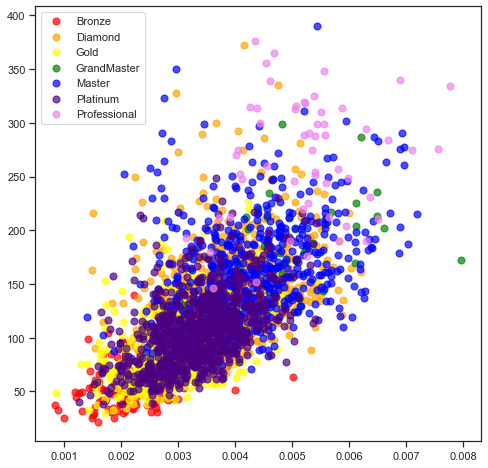

In [10]:
import numpy as np
import matplotlib.pyplot as plt
FLIPPER_LENGTH = data["NumberOfPACs"].values
BILL_LENGTH = data["APM"].values

SPECIES = data["LeagueIndex"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#ff0000", "#ffa500", "#ffff00", "#008000", "#0000ff", "#4b0082", "#ee82ee" ]

fig, ax = plt.subplots(figsize=(8,8))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();


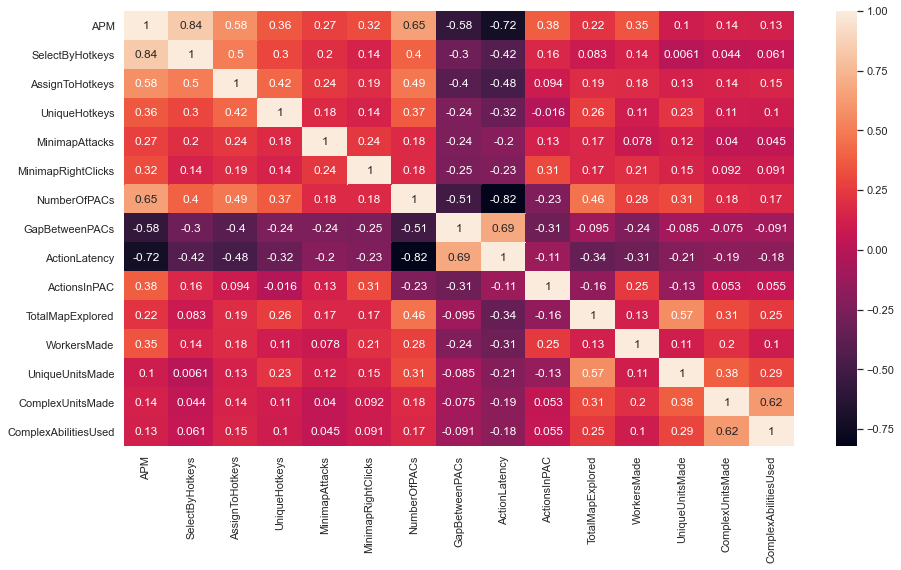

In [14]:
corr_matrix = data.corr()

sns.heatmap(data.corr(), annot=True)
sns.set(rc = {'figure.figsize':(30,30)})
